# Level 4 Questions
1. List the top 10 tracks in the global throughout year 2017 with their total stream counts.
2. List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, with the stream counts of each of their tracks.
3. List the top 10 tracks in December, 2017 for each continent (North America, Europe, Asia, South America, Oceania).
    - You may need this extra data for mapping countries to continents.
4. Plot the ranking changes of the Ed Sheeran's "Shape of You" alongside with the stream count changes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
# print(df)

In [3]:
df.head(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [4]:
df.Date = pd.to_datetime(df.Date)

## Question 1: List the top 10 tracks in the global throughout year 2017 with their total stream counts.

In [5]:
df_q1_filtered = df[df['Date'].dt.year == 2017]

In [6]:
df_q1_by_name_and_year = df_q1_filtered.groupby(['Track Name', df.Date.dt.year])
# print(df_q1_by_name_and_year.head(1))

In [7]:
df_q1_by_name_and_year['Streams'].sum().reset_index(name='Total stream counts').nlargest(10, columns='Total stream counts')

,Track Name,Date,Total stream counts
12686,Shape of You,2017,2954314942
3288,Despacito - Remix,2017,1808988398
3287,Despacito (Featuring Daddy Yankee),2017,1449083311
13189,Something Just Like This,2017,1366414897
14977,Unforgettable,2017,1341220672
5476,HUMBLE.,2017,1288359986
6457,I'm the One,2017,1241605052
16455,rockstar,2017,1186411578
6779,It Ain't Me (with Selena Gomez),2017,1179203261
16011,XO TOUR Llif3,2017,1145302505


## Question 2: List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, with the stream counts of each of their tracks.

In [8]:
df_q2_by_artist_and_name = df.groupby(['Artist', 'Track Name'])['Streams'].sum().reset_index(name='Total stream counts')

In [9]:
top10_q2 = df.groupby('Artist')['Streams'].sum().reset_index(name='Whole stream counts').nlargest(10, columns='Whole stream counts')

In [10]:
top10_q2.merge(df_q2_by_artist_and_name, on='Artist')

,Artist,Whole stream counts,Track Name,Total stream counts
0,Ed Sheeran,8913973976,...Baby One More Time - Recorded at Spotify St...,1692174
1,Ed Sheeran,8913973976,Afire Love,10698
2,Ed Sheeran,8913973976,All Of The Stars,13116
3,Ed Sheeran,8913973976,Barcelona,130094807
4,Ed Sheeran,8913973976,Bibia Be Ye Ye,75939105
5,Ed Sheeran,8913973976,Bloodstream,1495651
6,Ed Sheeran,8913973976,Castle on the Hill,950641030
7,Ed Sheeran,8913973976,Castle on the Hill - Acoustic,117612
8,Ed Sheeran,8913973976,Castle on the Hill - Seeb Remix,30098
9,Ed Sheeran,8913973976,Castle on the Hill- Recorded at Spotify Studio...,3658


## Question 3: List the top 10 tracks in December, 2017 for each continent (North America, Europe, Asia, South America, Oceania). 

In [11]:
df_country_continent_mapping = pd.read_csv('country_continent.csv', keep_default_na=False)
# print(df_country_continent_mapping)

In [12]:
df_country_continent_mapping['iso 3166 country'] = df_country_continent_mapping['iso 3166 country'].str.lower()
df_country_continent_mapping['continent code'] = df_country_continent_mapping['continent code'].str.lower()
df_country_continent_mapping.columns = ['Region', 'continent code']
# print(df_country_continent_mapping)

In [13]:
df_q3_with_continent_code = df.merge(df_country_continent_mapping, on='Region')

In [14]:
df_q3_with_total = df_q3_with_continent_code.groupby(['continent code', 'Track Name'])['Streams'].sum().reset_index(name="Total stream counts")

In [15]:
# North America, Europe, Asia, South America, Oceania
code_to_name = [{'continent code': 'as', 'Continent': 'Asia'}, 
                {'continent code': 'eu', 'Continent': 'Europe'}, 
                {'continent code': 'na', 'Continent': 'North America'}, 
                {'continent code': 'sa', 'Continent': 'South America'}, 
                {'continent code': 'oc', 'Continent': 'Oceania'}, 
                {'continent code': 'af', 'Continent': 'Africa'},
                {'continent code': 'an', 'Continent': 'Antarctica'}]
df_code_to_name = pd.DataFrame(code_to_name)
df_q3_with_total.groupby('continent code').apply(lambda x: x.nlargest(10, columns='Total stream counts')).reset_index(drop='true').merge(df_code_to_name, on='continent code')[['Continent', 'Track Name', 'Total stream counts']]

,Continent,Track Name,Total stream counts
0,Asia,Shape of You,126278938
1,Asia,Something Just Like This,90022432
2,Asia,Say You Won't Let Go,82123133
3,Asia,Despacito - Remix,77294601
4,Asia,That's What I Like,75485932
5,Asia,Perfect,70744001
6,Asia,Versace On The Floor,64421489
7,Asia,Attention,63791918
8,Asia,I'm the One,61577066
9,Asia,Symphony (feat. Zara Larsson),59426154


## Question 4: Plot the ranking changes of the Ed Sheeran's "Shape of You" alongside with the stream count changes.

In [16]:
df_q4_filtered = df[df['Track Name'] == 'Shape of You']

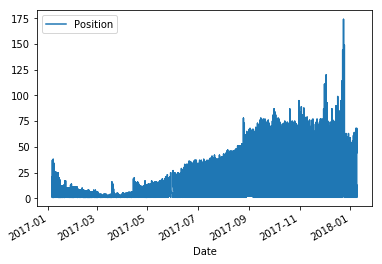

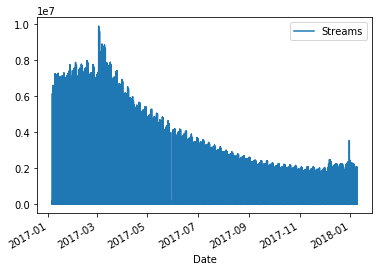

In [17]:
# fig, (ax, ax2) = plt.subplots(ncols=2)
df_q4_filtered.plot(x='Date', y='Position', layout=(1,1))
df_q4_filtered.plot(x='Date', y='Streams', layout=(2,1))